# Predicting Air Quality Index (AQI) with Random Forest

This notebook demonstrates how to predict the Air Quality Index (AQI) using a Random Forest Regressor and visualize the results. We'll walk through data loading, cleaning, feature selection, model training, evaluation, and result visualization.

## 1. Import Required Libraries

Let's import the necessary libraries for data analysis, visualization, and machine learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

## 2. Load and Clean the Dataset

Load the air pollution dataset from a CSV file and remove any rows with missing values to ensure data quality.

In [2]:
# Load the dataset
data_file_path = 'global_air_pollution_dataset.csv'
aq_data = pd.read_csv(data_file_path)

# Remove rows with missing values
aq_data = aq_data.dropna(axis=0)

# Display the first few rows
aq_data.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


## 3. Select Features and Target Variable

Choose relevant air quality features as input variables and set AQI Value as the target for prediction.

In [3]:
# Select features and target variable
aq_features = ['CO AQI Value', 'Ozone AQI Value', 'PM2.5 AQI Value', 'NO2 AQI Value']
X = aq_data[aq_features]
y = aq_data['AQI Value']

# Show the selected features
X.head()

,CO AQI Value,Ozone AQI Value,PM2.5 AQI Value,NO2 AQI Value
0,1,36,51,0
1,1,5,41,1
2,1,39,66,2
3,1,34,20,0
4,0,22,6,0


## 4. Split Data into Training and Validation Sets

Split the data into training and validation sets to evaluate model performance.

In [4]:
# Split the data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training set size: {train_X.shape[0]}")
print(f"Validation set size: {val_X.shape[0]}")

Training set size: 18428
Validation set size: 4607


## 5. Train Random Forest Regressor

Initialize and fit a Random Forest Regressor model on the training data.

In [5]:
# Initialize and train the model
aq_forest_model = RandomForestRegressor(random_state=1)
aq_forest_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

## 6. Make Predictions and Evaluate Model

Predict AQI values for both sample and validation data, then calculate and display the mean absolute error.

In [6]:
# Predict AQI for the first 5 rows
print("--- Predicting AQI for first 5 rows ---")
print("Input features:")
print(X.head())
print("\nPredicted AQI Values:")
print(aq_forest_model.predict(X.head()))

# Predict on validation set
val_predictions = aq_forest_model.predict(val_X)
mae = mean_absolute_error(val_y, val_predictions)

# Show evaluation results
print("\n--- Validation Results ---")
print(f"Mean Absolute Error: {mae:.2f}")
print("\nFirst 5 validation predictions:")
print(val_predictions[:5])
print("\nActual AQI values:")
print(val_y[:5].values)

--- Predicting AQI for first 5 rows ---
Input features:
   CO AQI Value  Ozone AQI Value  PM2.5 AQI Value  NO2 AQI Value
0             1               36               51              0
1             1                5               41              1
2             1               39               66              2
3             1               34               20              0
4             0               22                6              0

Predicted AQI Values:
[51. 41. 66. 34. 22.]

--- Validation Results ---
Mean Absolute Error: 0.15

First 5 validation predictions:
[35. 19. 37. 49. 93.]

Actual AQI values:
[35 19 37 49 93]


## 7. Visualize Feature Correlations with Heatmap

Compute the correlation matrix of numerical features and plot a heatmap using seaborn to understand feature relationships.

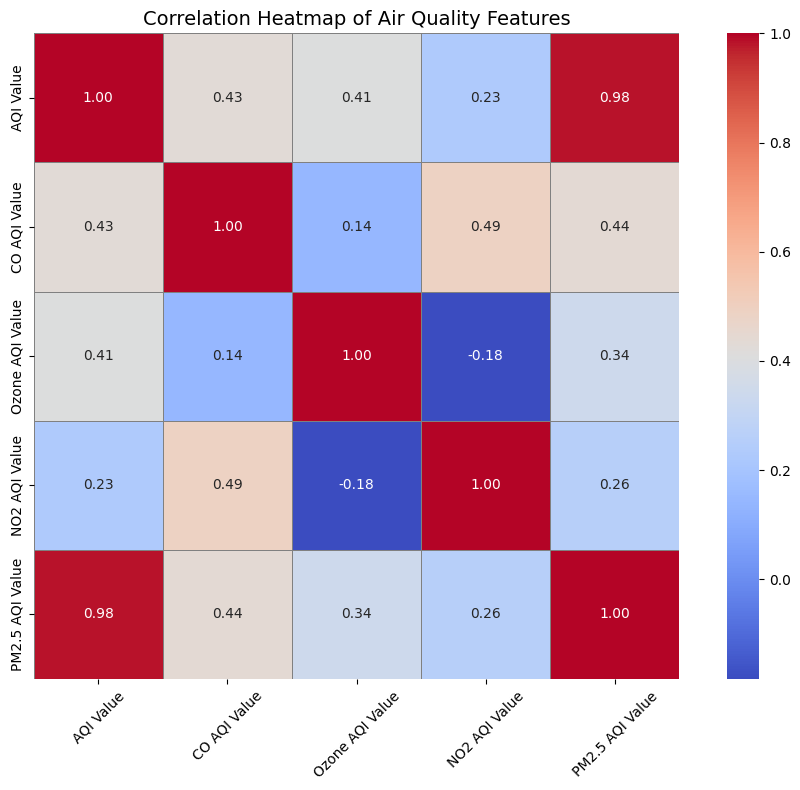

In [7]:
# Compute correlation matrix
corr_matrix = aq_data.select_dtypes(include='number').corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            linewidths=0.5, linecolor='gray')

plt.title("Correlation Heatmap of Air Quality Features", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Visualize Prediction Residuals

Plot a histogram of residuals (actual minus predicted AQI values) to assess prediction errors.

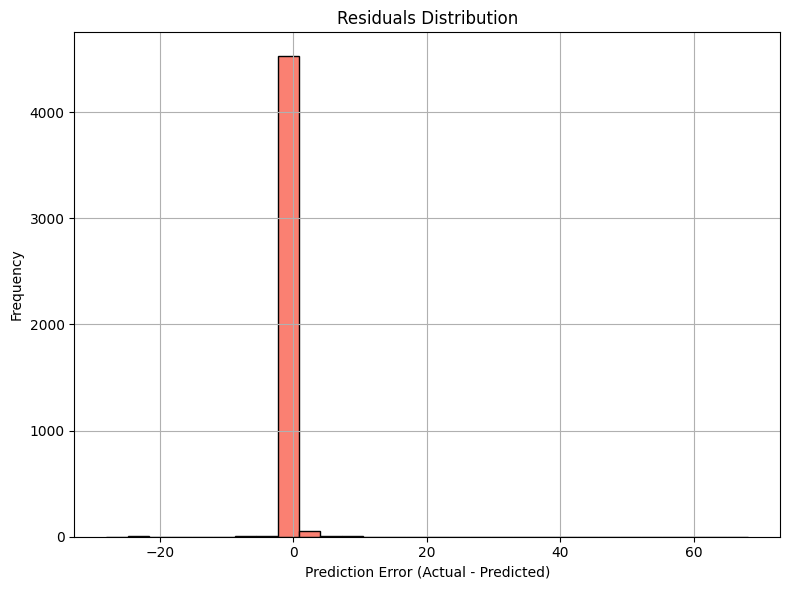

In [8]:
# Calculate residuals
residuals = val_y - val_predictions

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor="black", color="salmon")

plt.title("Residuals Distribution")
plt.xlabel("Prediction Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()